# We will be creating a simple Quantum Program and running it on a QPU and then scale it for larger programs for utiliy

## Hello World example on a 2 quibit bell state

In [1]:
# Quantum Computational workflows
"""
1. Map the problem to circuits and operators (quantum native format)
2. Optimize the process(circuits and operators)
3. Execute it on a backend a quantum primitive function
4. Post process or analyze the result 
"""

'\n1. Map the problem to circuits and operators (quantum native format)\n2. Optimize the process(circuits and operators)\n3. Execute it on a backend a quantum primitive function\n4. Post process or analyze the result \n'

# Step 1 Map the problem to circuits and operators


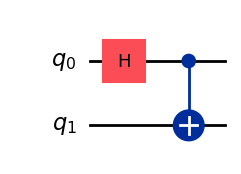

In [2]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

qc = QuantumCircuit(2) # this creates two quibits

# Hardamard gate
qc.h(0) # This makes quibit 0 in quantum superposition 

# Controlled not 
qc.cx(0, 1) # This causes both quibit 0 and 1 to be entagled and 

qc.draw('mpl')

When working with quntum circuits you need to think of what data you want
to be returned is it;
1. A probability distribution for a set of quibits you wish to measure
2. The expectation value of the observable
 

In [3]:
from qiskit.quantum_info import SparsePauliOp
observable_label = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
observable = [SparsePauliOp(label) for label in observable_label]
observable

[SparsePauliOp(['IZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IX'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZI'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['XI'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['XX'],
               coeffs=[1.+0.j])]

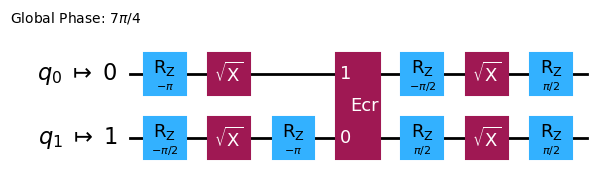

In [9]:
# Step 2 optimize the process (circuits and operators)
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

isa_circquit = pm.run(qc)

isa_circquit.draw('mpl', idle_wires=False)

# Executing using quantum primitives

In [ ]:
from qiskit_ibm_